In [143]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [144]:
df = pd.read_csv('Training/Social_Network_Ads.csv')

In [145]:
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19.0,19000.0,0
1,15810944,Male,35.0,20000.0,0
2,15668575,Female,26.0,43000.0,0
3,15603246,Female,27.0,57000.0,0
4,15804002,Male,19.0,76000.0,0
...,...,...,...,...,...
395,15691863,Female,46.0,41000.0,1
396,15706071,Male,51.0,23000.0,1
397,15654296,Female,50.0,20000.0,1
398,15755018,Male,36.0,33000.0,0


In [146]:
x = df[['Age','EstimatedSalary']]
y = df['Purchased']

In [147]:
from sklearn.preprocessing import MinMaxScaler
sca = MinMaxScaler()
x_scaled = sca.fit_transform(x)

In [148]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,random_state = 0)

In [149]:
x_train.shape

(300, 2)

In [150]:
y_train.shape

(300,)

In [151]:
from sklearn.naive_bayes import GaussianNB

In [152]:
gnb = GaussianNB()

In [153]:
gnb.fit(x_train,y_train)

GaussianNB()

In [154]:
y_pred = gnb.predict(x_test)

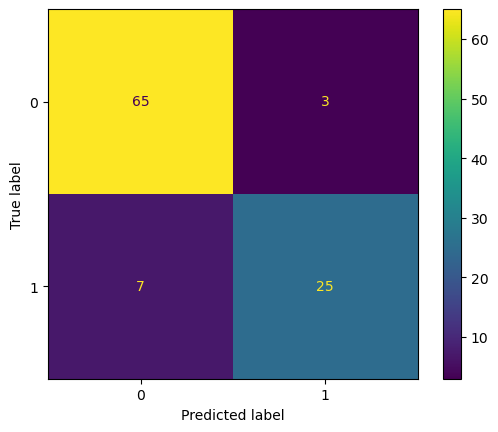

In [155]:
from sklearn.metrics import ConfusionMatrixDisplay, classification_report, accuracy_score
ConfusionMatrixDisplay.from_predictions(y_test,y_pred)

In [156]:
accuracy_score(y_test,y_pred)

0.9

In [157]:
### boosting

In [158]:
from sklearn.ensemble import AdaBoostClassifier
adb = AdaBoostClassifier(gnb,random_state = 0,n_estimators = 50)
import warnings
warnings.filterwarnings('ignore')

In [159]:
adb.fit(x_train,y_train)

AdaBoostClassifier(estimator=GaussianNB(), random_state=0)

In [160]:
y_pred = adb.predict(x_test)
accuracy_score(y_test,y_pred)

0.93

In [161]:
#  voting is ensemble maching learning algorithm and summing the votes for crisp class labels form the other models and all

In [162]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [163]:
dt = DecisionTreeClassifier(random_state=0)
gb = GaussianNB()
rf = RandomForestClassifier(random_state =0)
log = LogisticRegression()
knn = KNeighborsClassifier(n_neighbors= 5)
svc = SVC(kernel = 'rbf', random_state = 0)

In [164]:
from sklearn.ensemble import VotingClassifier

In [165]:
vot = VotingClassifier(estimators = [('dt' , dt),('NB',gb),('RF',rf),
                                    ('LOG',log),('KNN',knn),('SVC',svc)])

In [166]:
vot.fit(x_train,y_train)

VotingClassifier(estimators=[('dt', DecisionTreeClassifier(random_state=0)),
                             ('NB', GaussianNB()),
                             ('RF', RandomForestClassifier(random_state=0)),
                             ('LOG', LogisticRegression()),
                             ('KNN', KNeighborsClassifier()),
                             ('SVC', SVC(random_state=0))])

In [167]:
y_pred = vot.predict(x_test)
accuracy_score(y_test,y_pred)

0.93